# Email Spam Classification

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
df=pd.read_csv('spam.csv',encoding='Latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df=df.rename({'v1':'label',
          'v2':'features'},axis=1)

In [7]:
df

,label,features
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   features  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe()

,label,features
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Checking for Null Values

In [10]:
df.isnull().sum()

label       0
features    0
dtype: int64

In [11]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

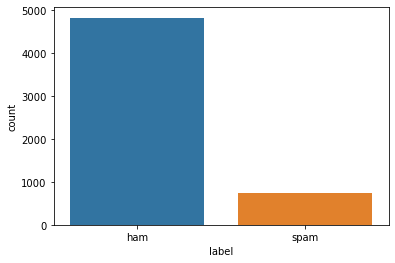

In [12]:
sns.countplot(data=df,x='label')

### Splitting the Data

In [13]:
X=df['features']
y=df['label']

# Importing Scikit Learn Libraries

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,ConfusionMatrixDisplay,confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

### Train|Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=31)

In [16]:
tfidf=TfidfVectorizer(stop_words='english',max_features=1000)

In [17]:
tfidf.fit(X_train)

TfidfVectorizer(max_features=1000, stop_words='english')

In [18]:
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [19]:
log_model=LogisticRegression()
knn_model=KNeighborsClassifier()
svc_model=SVC()
rfc_model=RandomForestClassifier()
multinomial_nb=MultinomialNB()
bernoulli_nb=BernoulliNB()
gaussian_nb=GaussianNB()

In [20]:
def model_fitting(model,data):
    model.fit(X_train_tfidf,y_train)
   

In [21]:
model_fitting(log_model,df)

In [22]:
model_fitting(knn_model,df)

In [23]:
model_fitting(svc_model,df)

In [24]:
model_fitting(rfc_model,df)

In [25]:
model_fitting(multinomial_nb,df)

In [26]:
model_fitting(bernoulli_nb,df)

In [27]:
gaussian_nb.fit(np.asarray(X_train_tfidf.todense()),y_train)

GaussianNB()

# Performance of Metrics

In [28]:
accuracy_scores=[]

In [29]:
def predictions(model,data):
    preds=model.predict(X_test_tfidf)
    a=accuracy_score(y_test,preds)
    accuracy_scores.append(a)

In [30]:
predictions(log_model,df)
predictions(knn_model,df)
predictions(svc_model,df)
predictions(rfc_model,df)
predictions(multinomial_nb,df)
predictions(bernoulli_nb,df)
gauss_pred=gaussian_nb.predict(np.asarray(X_test_tfidf.todense()))
accuracy_scores.append(accuracy_score(y_test,gauss_pred))

In [31]:
def confusion_matrix(model,data):
    pred=model.predict(X_test_tfidf)
    plot_confusion_matrix(model,X_test_tfidf,y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: Co

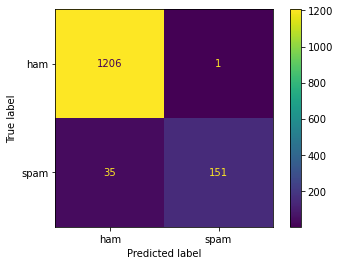

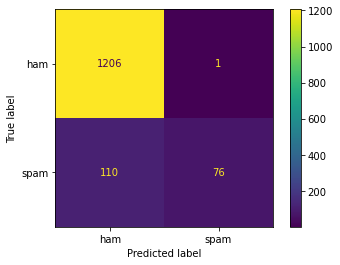

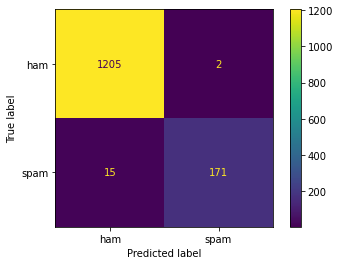

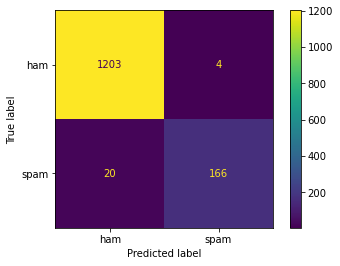

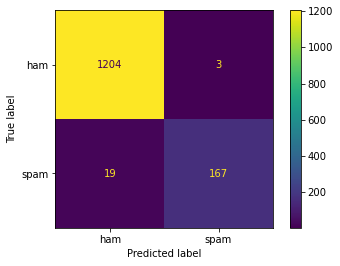

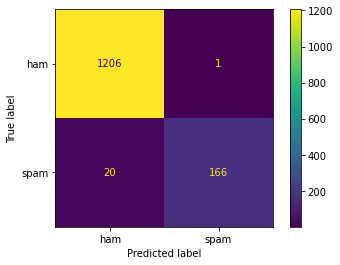

In [32]:
model_list=[log_model,knn_model,svc_model,rfc_model,multinomial_nb,bernoulli_nb]
for model in model_list:
    pred=model.predict(X_test_tfidf)
    plot_confusion_matrix(model,X_test_tfidf,y_test)


In [33]:
accuracy_scores

[0.9741564967695621,
 0.9195979899497487,
 0.9877961234745154,
 0.9827709978463748,
 0.9842067480258435,
 0.9849246231155779,
 0.7932519741564967]

### Dataframe of Metrics

In [34]:
pd.DataFrame({'Models':['Logistic_Regressoion','K_Nearest_Classifier','Support_Vector_Classifier','Random_Forest_Classifier',
                        'Multinomial NB','Binomial_NB','Gaussian NB'],
             'accuracy_score':accuracy_scores})

,Models,accuracy_score
0,Logistic_Regressoion,0.974156
1,K_Nearest_Classifier,0.919598
2,Support_Vector_Classifier,0.987796
3,Random_Forest_Classifier,0.982771
4,Multinomial NB,0.984207
5,Binomial_NB,0.984925
6,Gaussian NB,0.793252


# Conclusion

### By observing all models,We can say that "Support Vector Classifier" is performing well.So we can use this model for future Classification